#### Importação do dataset Iris

In [1]:
from sklearn.datasets import load_iris

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)

X = X.loc[:, ['petal length (cm)', 'petal width (cm)']]

#### Visualização dos pontos

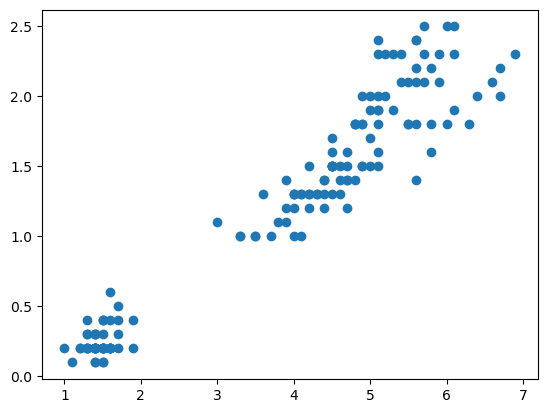

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'])

plt.show()

#### Importação do K-Means

In [4]:
from sklearn.cluster import KMeans

kmeans2 = KMeans(n_clusters=2, random_state=0).fit(X)

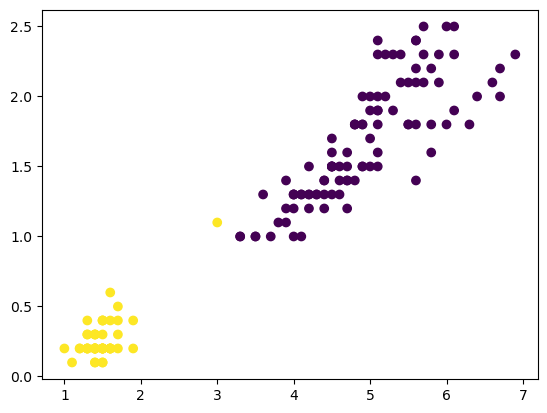

In [5]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans2.labels_)

plt.show()

In [6]:
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(X)

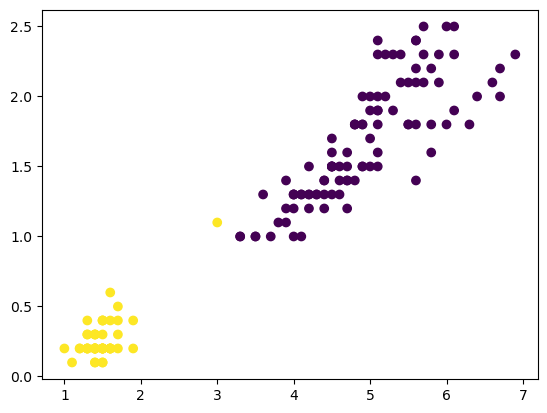

In [7]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans2.labels_)

plt.show()

In [8]:
kmeans4 = KMeans(n_clusters=4, random_state=0).fit(X)

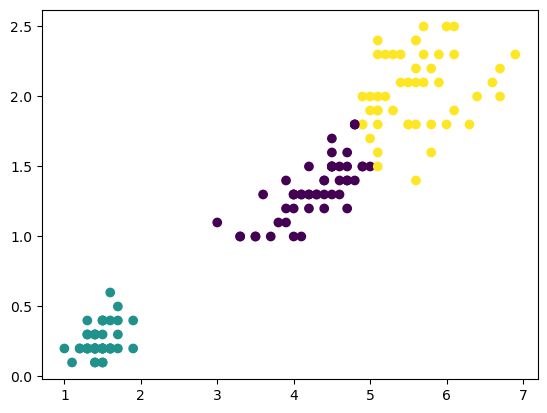

In [9]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans3.labels_)

plt.show()

In [10]:
kmeans5 = KMeans(n_clusters=5, random_state=0).fit(X)

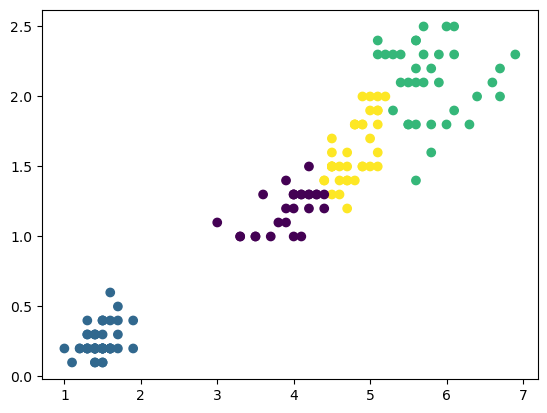

In [11]:
fig, ax = plt.subplots()

ax.scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans4.labels_)

plt.show()

#### Elbow Method

In [12]:
valores_k = []
inercias = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    inercias.append(kmeans.inertia_)

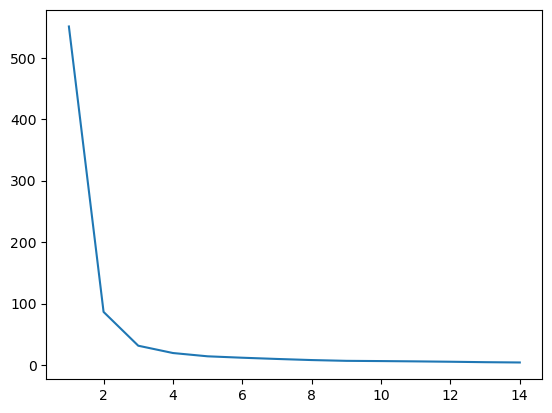

In [13]:
fig, ax = plt.subplots()

ax.plot(valores_k, inercias)

plt.show()

#### Comparando clusters gerados com classes originais

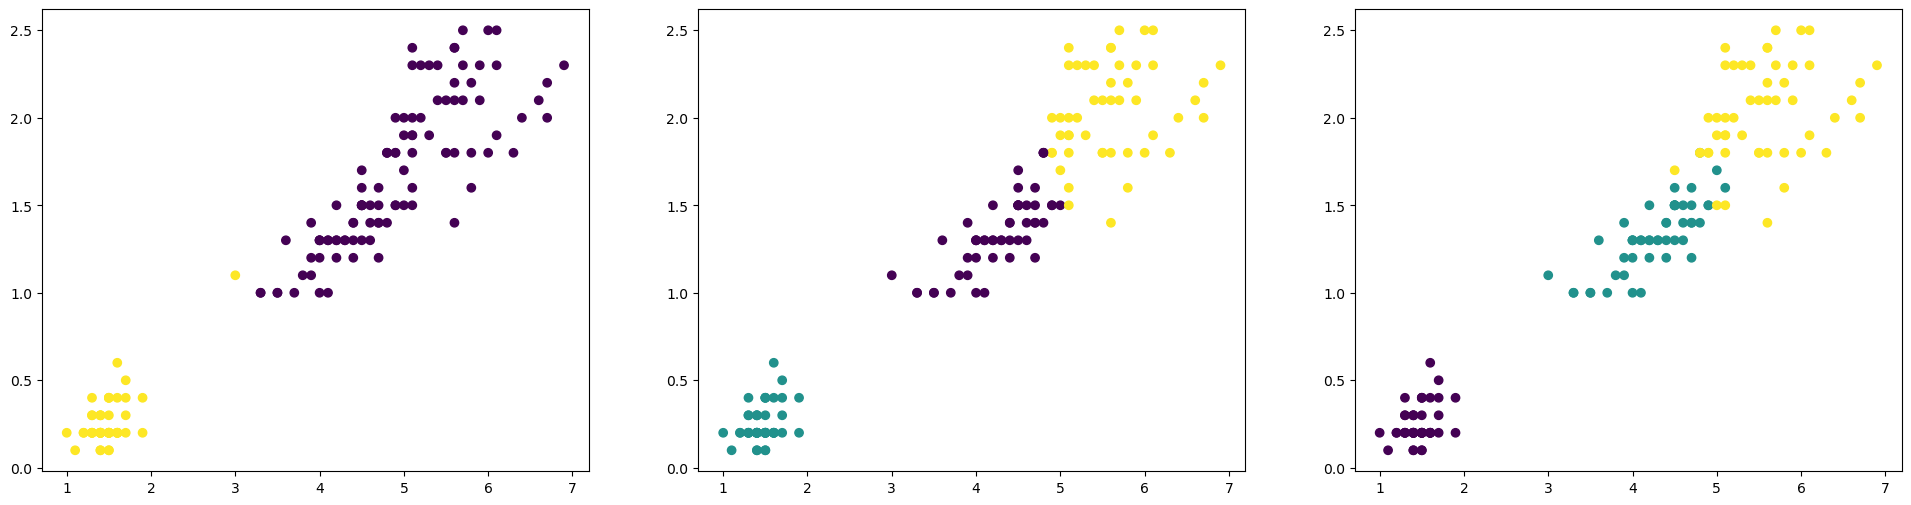

In [14]:
fig, ax = plt.subplots(ncols=3, figsize=(24,6))

ax[0].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans2.labels_)
ax[1].scatter(X['petal length (cm)'], X['petal width (cm)'], c=kmeans3.labels_)
ax[2].scatter(X['petal length (cm)'], X['petal width (cm)'], c=y)

plt.show()

In [15]:
# 0 -> Aleatório, 1 -> Menos aleatório, <0 -> Pior que aleatório
from sklearn.metrics import adjusted_rand_score, rand_score

valores_k = []
ari = []
ri = []

for i in range(1,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    ari.append(adjusted_rand_score(y, kmeans.labels_))
    ri.append(rand_score(y, kmeans.labels_))

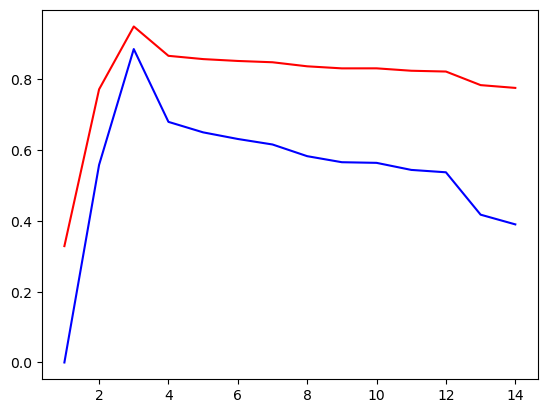

In [16]:
fig, ax = plt.subplots()

ax.plot(valores_k, ari, 'b')
ax.plot(valores_k, ri, 'r')

plt.show()

In [17]:
# Silhouette Coefficient
from sklearn.metrics import silhouette_score

valores_k = []
sc = []

for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
    valores_k.append(i)
    sc.append(silhouette_score(X, kmeans.labels_))

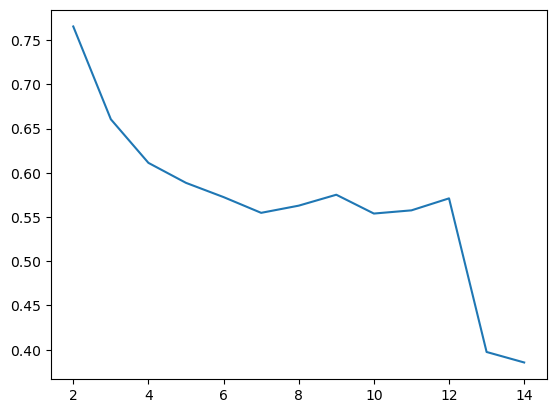

In [18]:
# Do melhor ao pior coeficiente. Não é necessariamente o melhor valor real
fig, ax = plt.subplots()

ax.plot(valores_k, sc)

plt.show()